# Illustrations for Global, Contextual, Collective Anomalies

In [1]:
import json
import random

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

In [3]:
BASE_COLOR = config['base_color']
LIGHT_COLOR = config['light_color']
DPI = config['dpi']
EDGE_COLOR = config['edge_color']
AXIS_COLOR = config['axis_color']
GRID_COLOR = config['grid_color']
FORMAT = config['format']

In [4]:
palette = f"blend:{BASE_COLOR},{LIGHT_COLOR}"

In [5]:
rc = {'axes.edgecolor': AXIS_COLOR,
      'axes.labelcolor': AXIS_COLOR,
      'grid.linestyle': '--',
      'text.color': AXIS_COLOR,
      'xtick.color': AXIS_COLOR,
      'ytick.color': AXIS_COLOR,
      'grid.color': GRID_COLOR}

In [6]:
sns.set(font_scale=2)
sns.set_style("whitegrid", rc=rc)
sns.set_context("talk")

In [7]:
np.random.seed(42)

In [8]:
global_normal, _ = make_blobs(centers=1, random_state=42)

In [9]:
global_normal = pd.DataFrame(global_normal, columns=['Признак 1', 'Признак 2'])

In [10]:
global_normal['anomaly'] = 0

In [11]:
global_anomaly = pd.DataFrame({'Признак 1': [-6, -7], 'Признак 2': [13, 13.1]})

In [12]:
global_anomaly['anomaly'] = 1

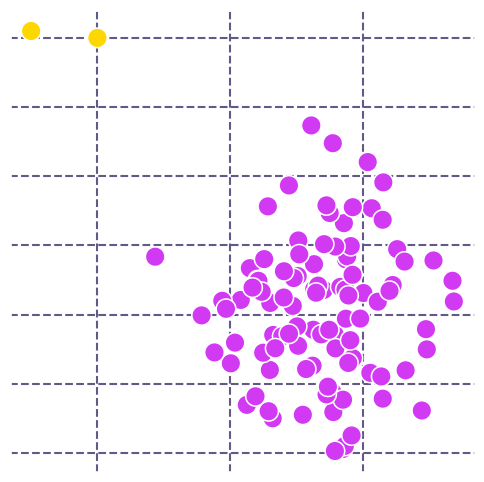

In [13]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(pd.concat([global_normal, global_anomaly]), x='Признак 1', y='Признак 2', 
                     s=200, edgecolor=EDGE_COLOR, hue='anomaly', legend=False, palette=palette)
ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])
plt.savefig(f"images/global_anomaly.{FORMAT}", bbox_inches='tight', transparent=True, dpi=DPI)

In [14]:
contextual_normal, _ = make_blobs(centers=np.array([[-2, -2], [2, 2]]), random_state=42)

In [15]:
contextual_normal = pd.DataFrame(contextual_normal, columns=['Признак 1', 'Признак 2'])

In [16]:
contextual_normal['anomaly'] = 0

In [17]:
contextual_anomaly = pd.DataFrame({'Признак 1': [-3, -3.1], 'Признак 2': [2, 2.9]})

In [18]:
contextual_anomaly['anomaly'] = 1

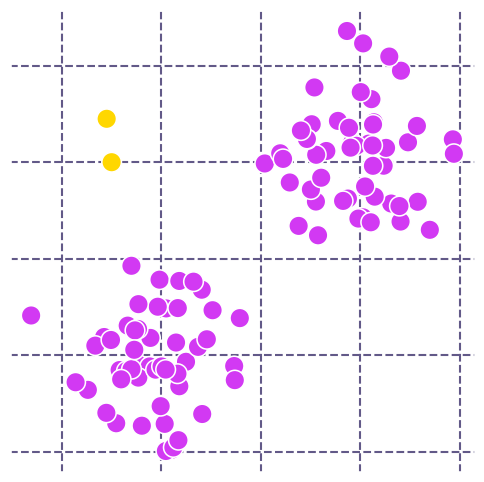

In [19]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(pd.concat([contextual_normal, contextual_anomaly]), x='Признак 1', y='Признак 2', 
                     s=200, edgecolor=EDGE_COLOR, hue='anomaly', legend=False, palette=palette)
ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])
plt.savefig(f"images/contextual_anomaly.{FORMAT}", bbox_inches='tight', transparent=True, dpi=DPI)

In [20]:
grid_size = (5, 5)

In [21]:
x = np.linspace(0, 1, grid_size[0])
y = np.linspace(0, 1, grid_size[1])

In [22]:
X, Y = np.meshgrid(x, y)

In [23]:
noise_level = 0.02
X_noisy = X + np.random.uniform(-noise_level, noise_level, X.shape)
Y_noisy = Y + np.random.uniform(-noise_level, noise_level, Y.shape)

In [24]:
coordinates = np.column_stack((X_noisy.ravel(), Y_noisy.ravel()))

In [25]:
collective_normal = pd.DataFrame(coordinates, columns=['Признак 1', 'Признак 2'])

In [26]:
collective_normal['anomaly'] = 0

In [27]:
collective_normal.loc[16, 'anomaly'] = 1

In [28]:
random.seed(42)

In [29]:
collective_anomaly = pd.DataFrame({'Признак 1': [0.3 + random.uniform(-0.08, 0.08) for _ in range(8)], 
                                   'Признак 2': [0.8 + random.uniform(-0.08, 0.08) for _ in range(8)]})

In [30]:
collective_anomaly['anomaly'] = 1

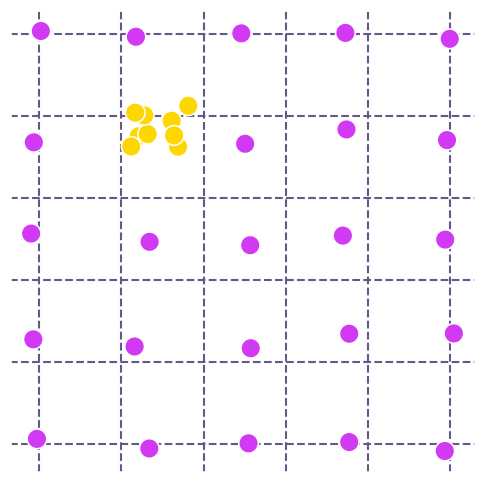

In [31]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(pd.concat([collective_normal, collective_anomaly]), x='Признак 1', y='Признак 2', 
                     s=200, edgecolor=EDGE_COLOR, hue='anomaly', legend=False, palette=palette)

ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])
plt.savefig(f"images/collective_anomaly.{FORMAT}", bbox_inches='tight', transparent=True, dpi=DPI)

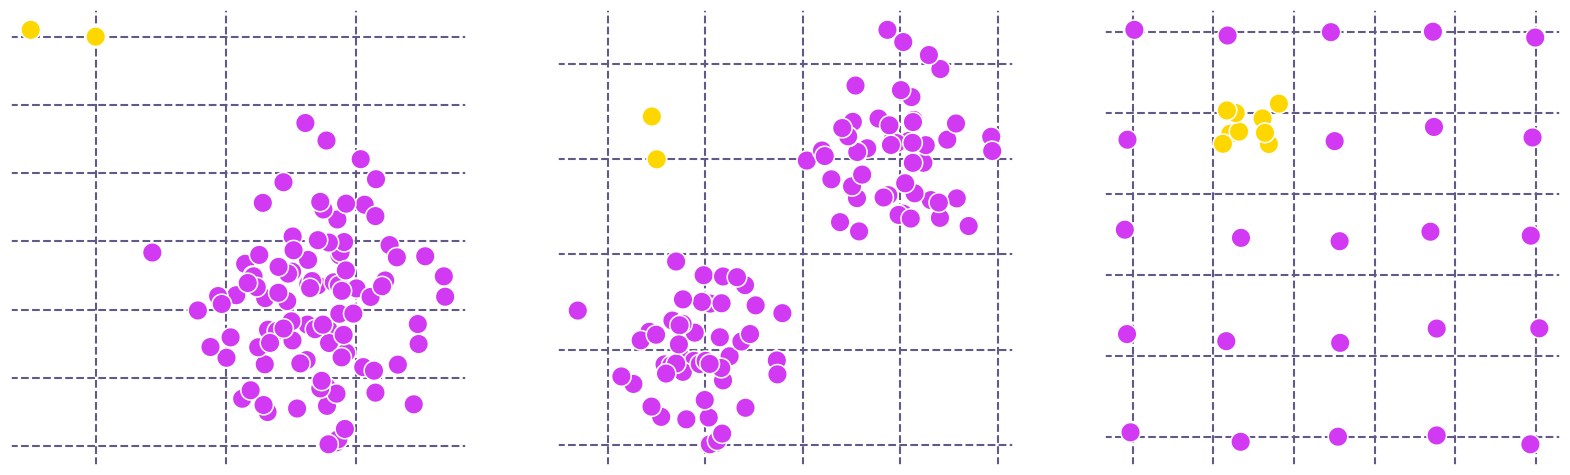

In [32]:
_, [axs_glob, axs_cont, axs_coll] = plt.subplots(1, 3,
                                     figsize=(20, 6), 
                                     sharex=False,
                                     gridspec_kw=dict(width_ratios=[1, 1, 1]))
sns.scatterplot(pd.concat([global_normal, global_anomaly]), x='Признак 1', y='Признак 2', 
                color='#00ab37', s=200, edgecolor=EDGE_COLOR, hue='anomaly', legend=False, 
                palette=palette, ax=axs_glob)
axs_glob.set(xlabel='', ylabel='')
axs_glob.set(xticklabels=[], yticklabels=[])
axs_glob.set_box_aspect(1)

sns.scatterplot(pd.concat([contextual_normal, contextual_anomaly]), x='Признак 1', y='Признак 2', 
                     s=200, edgecolor=EDGE_COLOR, hue='anomaly', legend=False, palette=palette, ax=axs_cont)
axs_cont.set(xlabel='', ylabel='')
axs_cont.set(xticklabels=[], yticklabels=[])
axs_cont.set_box_aspect(1)

sns.scatterplot(pd.concat([collective_normal, collective_anomaly]), x='Признак 1', y='Признак 2', 
                s=200, edgecolor=EDGE_COLOR, hue='anomaly', legend=False, palette=palette, ax=axs_coll)

axs_coll.set(xlabel='', ylabel='')
axs_coll.set(xticklabels=[], yticklabels=[])
axs_coll.set_box_aspect(1)

plt.savefig(f"images/global_contextual_collective_anomaly.{FORMAT}", bbox_inches='tight', transparent=True, dpi=DPI)